## Exercise through the following article from Medium
__[predicting Animal Selter Outcomes ] (https://medium.com/vickdata/predicting-animal-shelter-outcomes-4c5fad5dbb4f)__


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train=pd.read_csv('data/train.csv')
train.shape

(26729, 10)

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


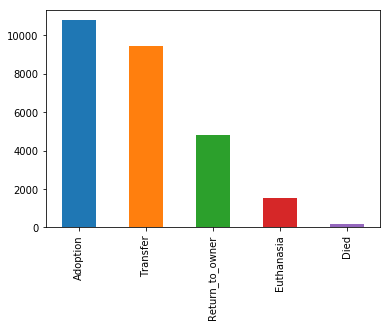

In [4]:
train['OutcomeType'].value_counts().plot.bar()

In [5]:
train.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [6]:
columns = train.columns
for column in columns:
    print(column)
    print(train[column].nunique())

AnimalID
26729
Name
6374
DateTime
22918
OutcomeType
5
OutcomeSubtype
16
AnimalType
2
SexuponOutcome
5
AgeuponOutcome
44
Breed
1380
Color
366


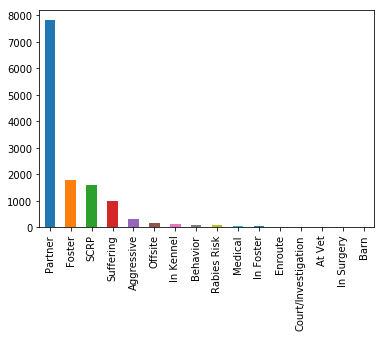

In [7]:
train['OutcomeSubtype'].value_counts().plot.bar()

In [8]:
train.groupby('OutcomeSubtype')[['OutcomeType']].describe()

OutcomeType                         
                          count unique         top  freq
OutcomeSubtype                                          
Aggressive                  320      1  Euthanasia   320
At Vet                        4      1        Died     4
Barn                          2      2    Adoption     1
Behavior                     86      1  Euthanasia    86
Court/Investigation           6      1  Euthanasia     6
Enroute                       8      1        Died     8
Foster                     1800      1    Adoption  1800
In Foster                    52      1        Died    52
In Kennel                   114      1        Died   114
In Surgery                    3      1        Died     3
Medical                      66      1  Euthanasia    66
Offsite                     165      1    Adoption   165
Partner                    7816      1    Transfer  7816
Rabies Risk                  74      1  Euthanasia    74
SCRP                       1599      1    Transfer  1599
Suffering                  1002      1  Euthanasia  1002

In [9]:
train.groupby('OutcomeType').describe()

AgeuponOutcome                        AnimalID         \
                         count unique       top  freq    count unique   
OutcomeType                                                             
Adoption                 10769     28  2 months  2636    10769  10769   
Died                       197     31   1 month    48      197    197   
Euthanasia                1553     39   2 years   275     1555   1555   
Return_to_owner           4786     35   2 years   917     4786   4786   
Transfer                  9406     41    1 year  1417     9422   9422   

                              AnimalType         ...    Name       \
                     top freq      count unique  ...     top freq   
OutcomeType                                      ...                
Adoption         A693292    1      10769      2  ...     Max   59   
Died             A714871    1        197      2  ...     Max    2   
Euthanasia       A679212    1       1555      2  ...   Rocky   11   
Return_to_owner  A679596    1       4786      2  ...   Bella   49   
Transfer         A690891    1       9422      2  ...       X   24   

                OutcomeSubtype                         SexuponOutcome         \
                         count unique        top  freq          count unique   
OutcomeType                                                                    
Adoption                  1966      3     Foster  1800          10769      4   
Died                       181      5  In Kennel   114            197      5   
Euthanasia                1554      6  Suffering  1002           1555      5   
Return_to_owner              0      0        NaN   NaN           4785      5   
Transfer                  9416      3    Partner  7816           9422      5   

                                      
                           top  freq  
OutcomeType                           
Adoption         Neutered Male  5222  
Died               Intact Male    79  
Euthanasia         Intact Male   477  
Return_to_owner  Neutered Male  2247  
Transfer         Intact Female  2550  

[5 rows x 36 columns]

### Deal with Missing Data

In [10]:
len(train)

26729

In [11]:
train.shape

(26729, 10)

In [12]:
train.apply(lambda x: sum(x.isnull()/len(train)))

AnimalID          0.000000
Name              0.287740
DateTime          0.000000
OutcomeType       0.000000
OutcomeSubtype    0.509260
AnimalType        0.000000
SexuponOutcome    0.000037
AgeuponOutcome    0.000673
Breed             0.000000
Color             0.000000
dtype: float64

In [13]:
train = train.drop('OutcomeSubtype', axis=1)

In [14]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [15]:
train['Name'] = train[['Name']].fillna(value=0)
train['has_name'] = (train['Name'] != 0).astype('int64')
train = train.drop('Name', axis=1)
train.head()

,AnimalID,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name
0,A671945,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1
1,A656520,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1
2,A686464,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1
3,A683430,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0
4,A667013,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0


In [16]:
print( train['Color'].value_counts().index[0])
 

Black/White


In [17]:
train = train.apply(lambda x : x.fillna(x.value_counts().index[0])  )
train.apply(lambda x: sum(x.isnull()/len(train)))
train.head()

,AnimalID,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name
0,A671945,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1
1,A656520,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1
2,A686464,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1
3,A683430,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0
4,A667013,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0


In [18]:
train = train.drop('AnimalID', axis = 1)

In [19]:
color_counts = train['Color'].value_counts()

In [20]:
#type(color_counts)
#print(set(color_counts[color_counts <300].index))
color_others = set(color_counts[color_counts<300].index )


In [21]:
train['top_colors'] = train['Color'].replace(list(color_others), 'Others')
print(train['top_colors'].nunique())


28


In [22]:
import re

train['breed_type'] = train['Breed'].str.extract('({})'.format('|'.join(['Mix'])), flags=re.IGNORECASE, expand=False).str.lower().fillna('pure') 
train.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name,top_colors,breed_type
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,Brown/White,mix
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,Others,mix
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,Blue/White,mix
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,Others,mix
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,Tan,pure


In [23]:
train['multi_color']  = train['Color'].apply(lambda x: 1 if '/' in x else 0)
train.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name,top_colors,breed_type,multi_color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,Brown/White,mix,1
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,Others,mix,0
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,Blue/White,mix,1
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,Others,mix,0
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,Tan,pure,0


In [24]:
def age_converter(row):
    age_string = row['AgeuponOutcome']
    [age,unit] = age_string.split(" ")
    unit = unit.lower()
    if("day" in unit):
        if age=='0': return 1
        return int(age)
    if("week" in unit):
        if(age)=='0': return 7
        return int(age)*7
    elif("month" in unit):
        if(age)=='0': return 30
        return int(age) * 30
    elif("year" in unit):
        if(age)=='0': return 365
        return int(age) *365


In [25]:
train['age_numeric'] = train.apply(age_converter, axis=1)
train.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,has_name,top_colors,breed_type,multi_color,age_numeric
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,Brown/White,mix,1,365
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,Others,mix,0,365
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,Blue/White,mix,1,730
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,Others,mix,0,21
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,Tan,pure,0,730


In [26]:
train = train.drop('AgeuponOutcome', axis=1)

In [27]:
train.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,has_name,top_colors,breed_type,multi_color,age_numeric
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,Brown/White,mix,1,365
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,Others,mix,0,365
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,Blue/White,mix,1,730
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,Others,mix,0,21
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,Tan,pure,0,730


In [28]:
train = train.drop(['Breed', 'Color', 'DateTime'], axis=1)
numeric_features = train.select_dtypes(include=['int64','float64']).columns

In [29]:
type(numeric_features)
numeric_features

Index(['has_name', 'multi_color', 'age_numeric'], dtype='object')

In [30]:
categorical_features = train.select_dtypes(include = ['object']).drop(['OutcomeType'], axis=1).columns
categorical_features

Index(['AnimalType', 'SexuponOutcome', 'top_colors', 'breed_type'], dtype='object')

In [31]:
dummy_columns = pd.get_dummies(train[categorical_features])

In [32]:
type(dummy_columns)

pandas.core.frame.DataFrame

In [33]:
final_train = pd.concat([dummy_columns, train], axis=1)
final_train = final_train.drop(['AnimalType', 'breed_type', 'SexuponOutcome', 'top_colors'], axis=1)

In [34]:
final_train.head()

,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,top_colors_Black,top_colors_Black/Brown,top_colors_Black/Tan,...,top_colors_White,top_colors_White/Black,top_colors_White/Brown,top_colors_White/Tan,breed_type_mix,breed_type_pure,OutcomeType,has_name,multi_color,age_numeric
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,Return_to_owner,1,1,365
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,Euthanasia,1,0,365
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,Adoption,1,1,730
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,Transfer,0,0,21
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,Transfer,0,0,730


In [35]:
X = final_train.drop('OutcomeType', axis = 1)
y = final_train['OutcomeType']

y.head()
X.head()


,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,top_colors_Black,top_colors_Black/Brown,top_colors_Black/Tan,...,top_colors_Tricolor,top_colors_White,top_colors_White/Black,top_colors_White/Brown,top_colors_White/Tan,breed_type_mix,breed_type_pure,has_name,multi_color,age_numeric
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,365
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,365
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,730
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,21
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,730


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_prob = rf_model.predict_proba(X_test)
print(log_loss(y_test, y_prob))


C:\Users\sherry.gow\AppData\Local\Continuum2\anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.5989524878413768
1.082002993999745


<function matplotlib.pyplot.show(*args, **kw)>

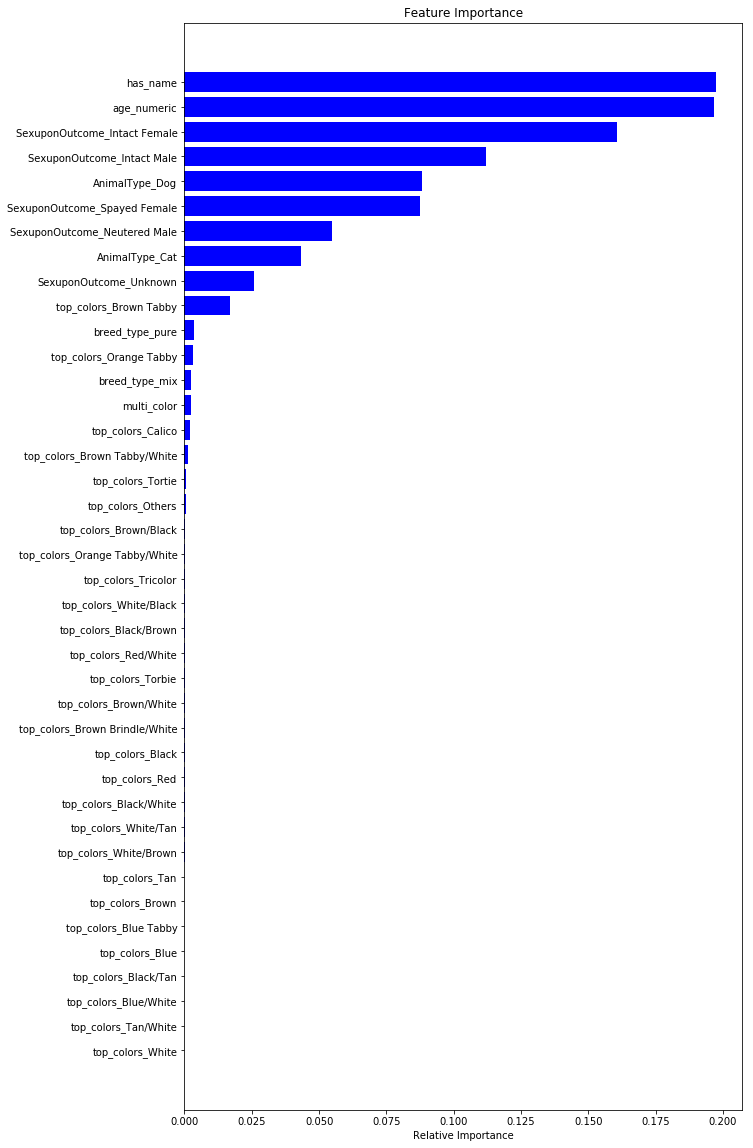

In [38]:
import numpy as np
features = X.columns
importances = rf_model.feature_importances_
indices =np.argsort(importances)

plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show